จากชุดข้อมูล student_score.csv และ TestDuration.csv ให้นิสิตแสดงการเขียนโค้ดเพื่อทำ data wrangling และทำการ plot ให้ได้ดังรูปต่อไปนี้

In [57]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.interchange.dataframe_protocol import DataFrame
%matplotlib inline

####  
### ตอนที่ 1: ชุดข้อมูล student_score.csv

In [58]:
df_score = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/student_score.csv")
# df_score.head()
# df_score.shape
display(df_score)

,ID,stat,math,comp,sec
0,ID-1,45.97,26.52,52.62,1
1,ID-2,40.05,17.13,42.89,1
2,ID-3,38.24,42.57,36.44,1
3,ID-4,40.64,16.69,43.22,1
4,ID-5,51.72,43.76,45.19,1
...,...,...,...,...,...
195,ID-196,41.04,71.91,70.96,2
196,ID-197,55.85,70.46,88.73,2
197,ID-198,39.49,67.62,63.27,2
198,ID-199,56.77,77.85,67.04,2


\
**1.1. จงแสดงวิธีการให้ได้มาซึ่งกราฟดังรูป**  
  
ข้อแนะนำ  
- ควรสร้างตัวแปรเพื่อเก็บ plot object ไว้ก่อน เช่น  
  g=sns.jointplot(...)  
  จากนั้นจึงจะสามารถใช้ g.ax_joint.axhline(...) และ g.ax_joint.axvline(...) ได้  ข้อนี้หากใช้ plt.axhline(...) และ plt.axvline(...) จะไม่ปรากฏเส้นบนกราฟ

![](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/ex4_plot1.svg)

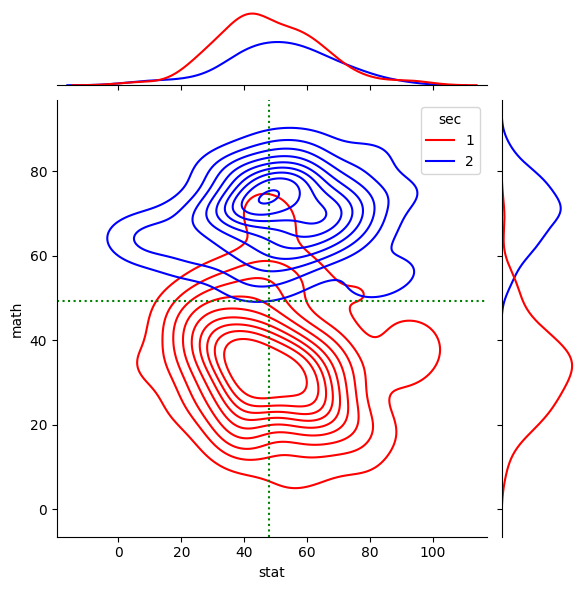

In [59]:
# Your code
graph_kde = sns.jointplot(
    data=df_score,
    x='stat',
    y='math',
    hue='sec',
    palette=['r', 'b'],
    kind='kde'
)
graph_kde.ax_joint.axhline(df_score['stat'].mean(), color='g', linestyle='dotted')
graph_kde.ax_joint.axvline(df_score['math'].mean(), color='g', linestyle='dotted')


\
**1.2. จงแสดงวิธีการให้ได้มาซึ่งกราฟดังรูป**  
พร้อมกับพิมพ์อธิบายว่าวิชาใดคะแนนของนิสิตต่างหมู่ (sec) มีความแตกต่างกันอย่างชัดเจน หากข้อสอบที่ใช้กับแต่ละหมู่เป็นข้อสอบคนละชุดให้นิสิตคาดการณ์ถึงสาเหตุที่ส่งผลให้นิสิตต่างหมู่มีคะแนนต่างกันอย่างชัดเจน  
  
ข้อแนะนำ  
- อาจต้องมีการแปลงข้อมูลให้อยู่ในรูปแบบที่สามารถใช้คำสั่ง plot ได้ง่ายขึ้น เช่น จากคอลัมน์ 'stat','math','comp' ทำอย่างไรให้มารวมอยู่ในคอลัมน์เดียวโดยตั้งชื่อว่า Subject โดยมีอีกคอลัมน์ชื่อ Score สำหรับเก็บคะแนนวิชานั้นๆ (นิสิตลองศึกษา https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

![](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/ex4_plot2.svg)

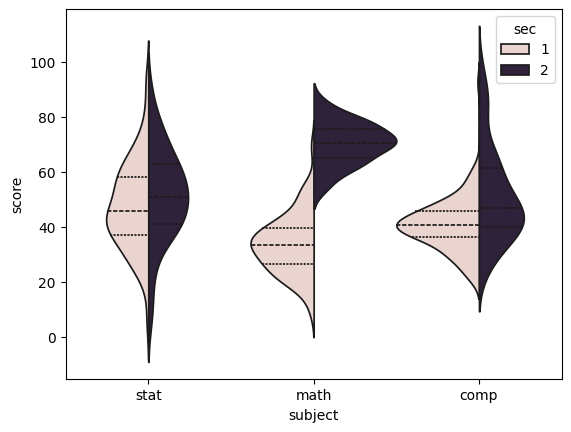

In [60]:
# Your code
graph_violin = sns.violinplot(
    data=pd.melt(
        df_score,
        id_vars=['sec'],
        value_vars=['stat', 'math', 'comp'],
        var_name='subject',
        value_name='score'
    ),
    x='subject',
    y='score',
    hue='sec',
    split=True,
    width=1,
    inner="quartile"
)


## Meaning of the graph
จากกราฟข้างบน จะเห็นว่ามีขีดแต่ละฝั่ง เป็นฝั่งละ 3 เส้น โดยขีดแต่ละขีดเรียกว่า `quartile` (จากที่เรากำหนดใน Inner)
และแต่ละขีดมีความหมายดังนี้
1. ขีดล่างสุด Quartile 1 (Q1) หมายถึง 25% ของข้อมูล
2. ขีดกลาง Quartile 2 (Q2) หมายถึง 50% ของข้อมูล หรือเรียกว่า Median
3. ขีดบนสุด Quartile 3 (Q3) หมายถึง 75% ของข้อมูล

####  
### ตอนที่ 2: ชุดข้อมูล TestDuration.csv

\
**2.1. จงแสดงวิธีการให้ได้มาซึ่งกราฟดังรูป**  
  
ข้อแนะนำ  
- Duration_mins หมายถึงช่วงเวลาตั้งแต่ Start ถึง End ในหน่วยนาที ดังนั้นต้องหาวิธีในการจัดการข้อมูลเวลา
- อาจพิจารณาใช้ total_seconds() ประกอบการคำนวณ https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html

![](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/ex4_plot3.svg)

In [61]:
df_test = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/TestDuration.csv")
df_test.head()
# df_test.shape

,Student ID,Group,Gender,Start,End
0,1,A,F,13:00,15:05
1,2,A,M,14:10,16:00
2,3,C,M,12:50,14:23
3,4,B,F,9:15,10:45
4,5,A,M,13:05,16:25


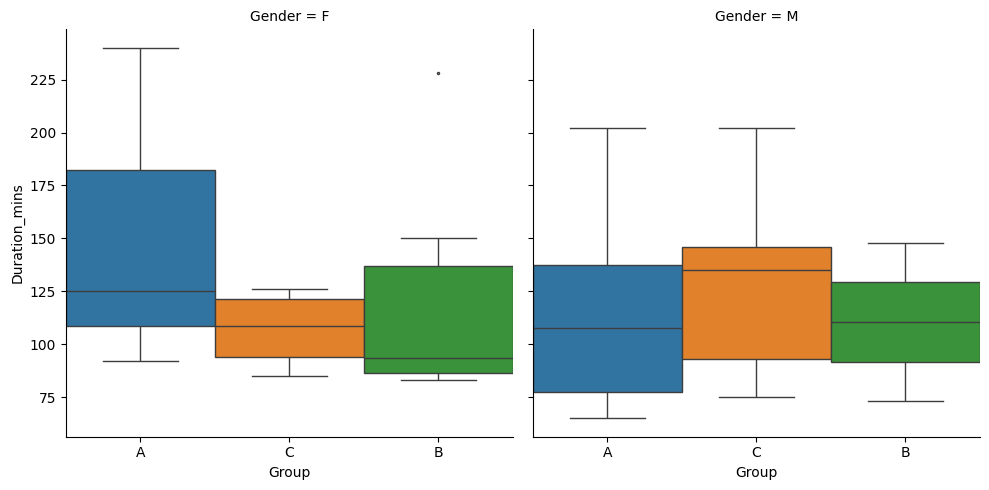

In [62]:
# Your code
# df_test['Start'] = pd.to_datetime(df_test['Start'])
# df_test['End'] = pd.to_datetime(df_test['End'])
# df_test['Duration_mins'] = (df_test['End']-df_test['Start']).dt.total_seconds() / 60

df_test.Start = pd.to_timedelta(df_test.Start + ':00')
df_test.End = pd.to_timedelta(df_test.End + ':00')
df_test['Duration'] = df_test.End - df_test.Start
df_test['Duration_mins'] = [du.total_seconds()/60 for du in df_test.Duration]
df_test.head()

graph_catplot = sns.catplot(
    data=df_test,
    kind='box',
    col='Gender',
    x='Group',
    y='Duration_mins',
    hue='Group',
    width=1,
    fliersize=1.5
)
# plt.show()